# Visualising sample collections over time

### Introduction

This notebook creates a figure which shows the distribution of *Plasmodium falciparum* samples, based on when they were collected. The figure highlights the additional data collected for the latest release (Pf8), in relation to those collected for previous work (Pf7).

**This notebook should take less than 2 minutes to run.**

## Setup

First, we need to ensure we have the packages installed which are needed to run the analysis. The code below installs the MalariaGEN data package, which is used to access the Pf8 data via the cloud.

In [1]:
!pip install malariagen_data -q --no-warn-conflicts
import malariagen_data

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.9/775.9 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 5.7 MB/s eta 0:00:00

In [2]:
# Install package
!pip install -q --no-warn-conflicts malariagen_data

Load the required Python libraries:

In [3]:
# Import previously installed packages
import malariagen_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

## Data Access

First load the Pf8 metadata, then output the top of the dataframe to check it is what we are expecting:


In [4]:
# Load Pf8 data
release_data = malariagen_data.Pf8()
sample_metadata = release_data.sample_metadata()

# View the first few lines of the metadata
sample_metadata.head()

,Sample,Study,Country,Admin level 1,Country latitude,Country longitude,Admin level 1 latitude,Admin level 1 longitude,Year,ENA,All samples same case,Population,% callable,QC pass,Exclusion reason,Sample type,Sample was in Pf7
0,FP0008-C,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR1081237,FP0008-C,AF-W,82.48,True,Analysis_set,gDNA,True
1,FP0009-C,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR1081238,FP0009-C,AF-W,88.95,True,Analysis_set,gDNA,True
2,FP0010-CW,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR2889621,FP0010-CW,AF-W,87.01,True,Analysis_set,sWGA,True
3,FP0011-CW,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR2889624,FP0011-CW,AF-W,86.95,True,Analysis_set,sWGA,True
4,FP0012-CW,1147-PF-MR-CONWAY,Mauritania,Hodh el Gharbi,20.265149,-10.337093,16.565426,-9.832345,2014.0,ERR2889627,FP0012-CW,AF-W,89.86,True,Analysis_set,sWGA,True


# Basic summaries of data
It is often useful to summarise the data by different variables. This gives a get a better sense of how the data is distributed, and is generally a good sense check to make sure the numbers are what we are expecting. Below are some simple summaries of the samples for three meta-variables included in the dataset:

1) Population
2) Year
3) Study

In [5]:
# Estimate the counts of samples from each population
sample_metadata['Population'].value_counts(dropna=False)

,count
Population,
AF-W,13656
AS-SE-E,7139
AF-E,5276
AS-SE-W,2262
AS-S-FE,1730
AF-C,1549
AF-NE,470
OC-NG,384
NaN,330


In [6]:
# Then we calculate the mean number of samples per year of the study, there was an average of ~2015 samples collected per year
pd.to_numeric(sample_metadata['Year'], errors='coerce').describe()

,Year
count,32995.000000
mean,2014.979057
std,5.250368
min,1966.000000
25%,2013.000000
50%,2016.000000
75%,2018.000000
max,2022.000000


In [7]:
# Then we calculate the number of samples, based on whether they were included in the Pf7 release.
# Here 'False' means these samples were made available as part of the new Pf8 dataset (a total of 12,461).
sample_metadata['Sample was in Pf7'].value_counts(dropna=False)

,count
Sample was in Pf7,
True,20864
False,12461


## Plotting sample collection date over time

The next step is to visualise when the samples were collected over time.

Here, we generate a histogram that shows when the samples were collected, separated into those included in the Pf8 data release, versus those included in the previous release (Pf7). In this plot, the x axis shows the year of sample collection, while the Y axis shows the count of samples collected. The blue bars show the samples which were included in the Pf7 dataset, while the red bars show the new samples included in the Pf8 release. The figure was generated using the matplotlib Python package, a introduction to which can be found here: https://matplotlib.org/stable/tutorials/pyplot.html.

As shown on the plot, there were many new samples included in the Pf8 release (12,461), which were collected mostly between 2018-2021.

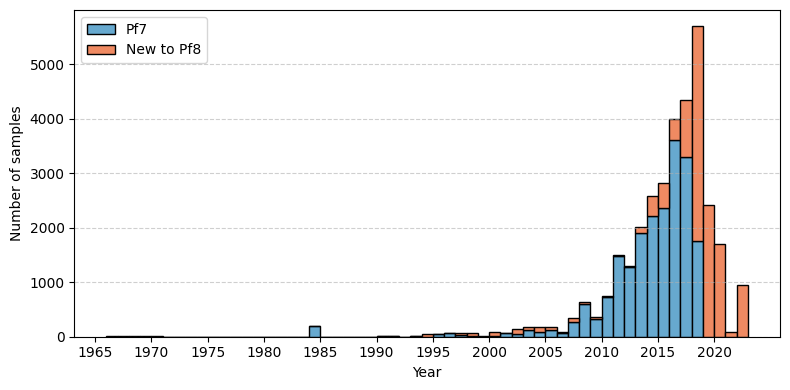

In [9]:
# Convert 'Year' to numeric and filter data
years = pd.to_numeric(sample_metadata['Year'], errors='coerce')
# Set the min and max year to determine the range of years to include in the plot
min_year = pd.to_numeric(sample_metadata['Year'], errors='coerce').min()
max_year = pd.to_numeric(sample_metadata['Year'], errors='coerce').max()

# Define bins for each year
bins = np.arange(min_year, max_year + 2)

# Create grouped data for stacking
pf7_samples = pd.to_numeric(sample_metadata.loc[sample_metadata['Sample was in Pf7'], 'Year'], errors='coerce')
pf8_samples = pd.to_numeric(sample_metadata.loc[~sample_metadata['Sample was in Pf7'], 'Year'], errors='coerce')

# Set up figure size and style
fig, ax = plt.subplots(figsize=(8, 4))

# Plot stacked histogram (stacked bar plot)
ax.hist(
    [pf7_samples, pf8_samples],  # Data for both groups
    bins=bins,
    stacked=True,  # Stacked bars
    color=['#67a9cf', '#ef8a62'],  # Colors for Pf7 and Pf8
    edgecolor='black',  # Border for better visibility
    label=['Pf7', 'New to Pf8']
)

# Include reference lines for the y-axis only
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.set_xticks(np.arange(1965, 2025, 5))

# Set axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of samples')

# Set axis legend
ax.legend(loc='upper left')

# Minimize padding around the plot
fig.tight_layout()

plt.show()



### Save the figure:


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save samples over time plot
# This will send the file to your Google Drive, where you can download it from if needed
# Change the file path if you wish to send the file to a specific location
# Change the file name if you wish to call it something else
file_path = '/content/drive/My Drive/'
file_name = 'Pf8_sample_collections_over_time'

# We save as both .png and .PDF files
fig.savefig(f'{file_path}{file_name}.png', dpi=250)
fig.savefig(f'{file_path}{file_name}.pdf')

## Conclusions

In summary, in this notebook, we accessed the MalariaGEN data available on the cloud for the latest *Plasmodium falciparum* data release (Pf8). After doing some basic summaries of the data, we created histograms of the samples per year, broken down by whether or not the sample was in Pf7 compared to Pf8.